# **Predicting stock prices with LSTM**

In [0]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [0]:
# get the stock prices for Apple
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')

df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
2012-01-10,60.857143,60.214287,60.844284,60.462856,64549100.0,52.484222
2012-01-11,60.407143,59.901428,60.382858,60.364285,53771200.0,52.398655
2012-01-12,60.414288,59.821430,60.325714,60.198570,53146800.0,52.254814
2012-01-13,60.064285,59.808571,59.957142,59.972858,56505400.0,52.058880


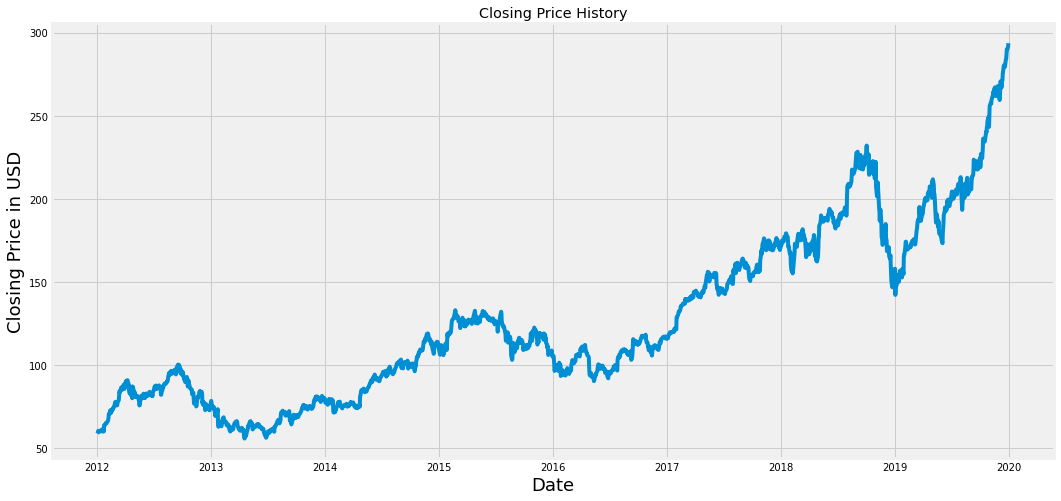

In [0]:
# Visualize the closing price trend
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in USD', fontsize = 18)
plt.show()

In [0]:
# taking only closing price
close_df = df.filter(['Close'])

# convert to nump array
close_array = close_df.values

In [0]:
# set the training size - 80% of the data
training_len = math.ceil(len(close_array)*0.8)
training_len

1610

**Creating Training Data**

In [0]:
train_data = close_array[0:training_len,:]

In [0]:
# Scaling the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)

train_data

array([[0.02202713],
       [0.02437883],
       [0.02926309],
       ...,
       [0.98748609],
       [0.98592179],
       [0.98912483]])

In [0]:
# splitting training data into inputs and the output
# taking 60 previous closing price as inputs for training and predicting the next price

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

  # printing a first sample of data
  if i <= 60:
    print(x_train)
    print(y_train)


[array([0.02202713, 0.02437883, 0.02926309, 0.03391327, 0.03320031,
       0.03480712, 0.03407288, 0.03283851, 0.03115723, 0.03636073,
       0.04105348, 0.03960628, 0.03167864, 0.03924447, 0.03179568,
       0.05972864, 0.05756849, 0.06038841, 0.06648576, 0.07017822,
       0.06986963, 0.06873105, 0.0735834 , 0.07814842, 0.08332004,
       0.09167333, 0.10922054, 0.10948656, 0.11925514, 0.12655493,
       0.11400902, 0.11884012, 0.11874436, 0.13229053, 0.13036445,
       0.13392921, 0.14033518, 0.14389999, 0.15416868, 0.1616494 ,
       0.1638095 , 0.16456505, 0.15177444, 0.14868847, 0.14914606,
       0.1611705 , 0.16455443, 0.17182227, 0.18895451, 0.21181167,
       0.20753392, 0.20754455, 0.22407024, 0.22924181, 0.22555998,
       0.22219742, 0.21869648, 0.2303272 , 0.23830809, 0.24164939])]
[0.23339185851208905]


In [0]:
# converting x_train and y_train to array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [0]:
x_train.shape

(1550, 60)

In [0]:
# reshaping the array for LSTM in to shape of (no.of obs, time step,  no.of feat)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_train.shape

(1550, 60, 1)

**Build LSTM Model**

In [0]:
model = Sequential()
model.add(LSTM(units= 40, input_shape = (x_train.shape[1],1), return_sequences=True))
model.add(LSTM(units = 80, return_sequences = False))
model.add(Dense(units= 125))
model.add(Dense(units=1))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# train the model
model.fit(x_train, y_train, batch_size=32, epochs= 50)

Epoch 1/50
49/49 [==============================] - 1s 25ms/step - loss: 0.0188
Epoch 2/50
49/49 [==============================] - 1s 25ms/step - loss: 0.0010
Epoch 3/50
49/49 [==============================] - 1s 26ms/step - loss: 9.0355e-04
Epoch 4/50
49/49 [==============================] - 1s 26ms/step - loss: 8.5581e-04
Epoch 5/50
49/49 [==============================] - 1s 26ms/step - loss: 7.9371e-04
Epoch 6/50
49/49 [==============================] - 1s 26ms/step - loss: 8.2866e-04
Epoch 7/50
49/49 [==============================] - 1s 25ms/step - loss: 7.5555e-04
Epoch 8/50
49/49 [==============================] - 1s 26ms/step - loss: 7.7329e-04
Epoch 9/50
49/49 [==============================] - 1s 26ms/step - loss: 6.7280e-04
Epoch 10/50
49/49 [==============================] - 1s 26ms/step - loss: 6.0898e-04
Epoch 11/50
49/49 [==============================] - 1s 26ms/step - loss: 6.2864e-04
Epoch 12/50
49/49 [==============================] - 1s 26ms/step - loss: 5.6779e-

**Test Set Evaluation**

In [0]:
# creating test data
test_data = close_array[training_len - 60:, :]

# scale test data
test_data = scaler.transform(test_data)

# create x_test and y_test
x_test = []
y_test = close_array[training_len:,:] # simply getting the actual closing prices 

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [0]:
# converting x_test to numpy array
x_test = np.array(x_test)

# reshape
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

x_test.shape

(402, 60, 1)

In [0]:
# predict the values for test data
pred_values = model.predict(x_test)

# inverse transform the predictions to scale them back to original values
pred_values = scaler.inverse_transform(pred_values)

In [0]:
# Evaluate the predictions with RMSE
rmse = np.sqrt(mean_squared_error(pred_values, y_test))
rmse

4.086178863545834

In [0]:
print(f"Our model prediction is on average of by {round(rmse,2)} dollar")

Our model prediction is on average of by 4.09 dollar


In [0]:
# plot prediction vs actual values
train = close_df[:training_len]
test = close_df[training_len:]
test['predictions'] = pred_values

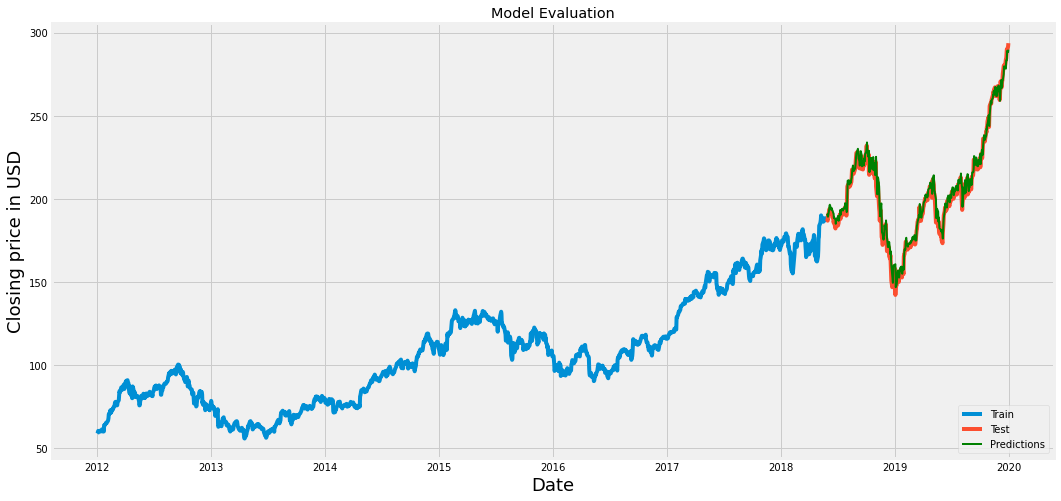

In [0]:
plt.figure(figsize=(16,8))
plt.title("Model Evaluation")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price in USD", fontsize = 18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(test['predictions'],"g-",linewidth = 2,)
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')
plt.show()

The model is performing good with RMSE score of 4.08. We will now include 
more features such as opening price, volume, low and high price to see if we can improve the performance of the model.

In [0]:
more_feature_df = df.copy()
# dropping Adj closing price
more_feature_df.drop('Adj Close', axis = 1, inplace=True)
more_feature_df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0


In [0]:
# train_data
train_data = more_feature_df[:training_len]
train_data.shape

(1610, 5)

In [0]:
# reset the index, remove the dates
train_data = train_data.reset_index(drop=True)
train_data.head()

,High,Low,Open,Close,Volume
0,58.928570,58.428570,58.485714,58.747143,75555200.0
1,59.240002,58.468571,58.571430,59.062859,65005500.0
2,59.792858,58.952858,59.278572,59.718571,67817400.0
3,60.392857,59.888573,59.967144,60.342857,79573200.0
4,61.107143,60.192856,60.785713,60.247143,98506100.0


In [0]:
# scaling the data
scaler = MinMaxScaler()
scaler.fit(train_data)

train_scaled = scaler.transform(train_data)
train_scaled

array([[0.01382652, 0.02570112, 0.02283528, 0.02202713, 0.17553371],
       [0.01616312, 0.02600223, 0.02347464, 0.02437883, 0.1466347 ],
       [0.02031106, 0.02964772, 0.02874923, 0.02926309, 0.1543374 ],
       ...,
       [0.98596988, 0.98419214, 0.97657866, 0.98748609, 0.02351021],
       [0.98852079, 0.98757962, 0.99462949, 0.98592179, 0.0322092 ],
       [0.994598  , 0.99841917, 0.99060155, 0.98912483, 0.0163951 ]])

In [0]:
# splitting training data into inputs and the output
# taking 60 previous data points as inputs for training and predicting the next closing price

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_scaled[i-60:i])  
  y_train.append(train_scaled[i,3]) # closing price is in the 4 th column


In [0]:
# convert the list to array
x_train = np.array(x_train)
y_train  = np.array(y_train)

x_train.shape, y_train.shape

((1550, 60, 5), (1550,))

## **LSTM Model**

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential()
model.add(LSTM(units= 40, input_shape = (x_train.shape[1],5), return_sequences=True))
model.add(LSTM(units = 80, return_sequences = False))
#model.add(LSTM(units = 120, return_sequences = False))
model.add(Dense(units= 125))
model.add(Dense(units=1))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 40)            7360      
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                38720     
_________________________________________________________________
dense_2 (Dense)              (None, 125)               10125     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 126       
Total params: 56,331
Trainable params: 56,331
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [0]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
49/49 [==============================] - 1s 26ms/step - loss: 0.0063
Epoch 2/50
49/49 [==============================] - 1s 25ms/step - loss: 8.3697e-04
Epoch 3/50
49/49 [==============================] - 1s 25ms/step - loss: 7.9558e-04
Epoch 4/50
49/49 [==============================] - 1s 26ms/step - loss: 7.7375e-04
Epoch 5/50
49/49 [==============================] - 1s 25ms/step - loss: 8.1239e-04
Epoch 6/50
49/49 [==============================] - 1s 25ms/step - loss: 6.6923e-04
Epoch 7/50
49/49 [==============================] - 1s 25ms/step - loss: 7.5739e-04
Epoch 8/50
49/49 [==============================] - 1s 25ms/step - loss: 6.4872e-04
Epoch 9/50
49/49 [==============================] - 1s 25ms/step - loss: 6.4341e-04
Epoch 10/50
49/49 [==============================] - 1s 25ms/step - loss: 5.8987e-04
Epoch 11/50
49/49 [==============================] - 1s 26ms/step - loss: 7.2294e-04
Epoch 12/50
49/49 [==============================] - 1s 25ms/step - loss: 6.70

## **Test Set Evaluation**

In [0]:
test_data = more_feature_df[training_len - 60 :]

test_data = test_data.reset_index(drop=True)

In [0]:
test_data.head()

,High,Low,Open,Close,Volume
0,176.300003,172.449997,172.800003,176.210007,38454000.0
1,177.740005,174.520004,175.210007,176.820007,28401400.0
2,178.250000,176.130005,177.910004,176.669998,23788500.0
3,175.850006,174.270004,174.940002,175.029999,31703500.0
4,177.119995,175.070007,175.479996,176.940002,23774100.0


In [0]:
# scaling test data
test_scaled = scaler.transform(test_data)

In [0]:
# prepare test data for LSTM
x_test= []
y_test = test_data['Close'][60:] # simply get the the actual closing price

for i in range(60, len(test_data)):
  x_test.append(test_scaled[i-60:i])  
  

In [0]:
x_test = np.array(x_test)
y_test = np.array(y_test)

x_test.shape, y_test.shape

((402, 60, 5), (402,))

In [0]:
# prediction
y_pred = model.predict(x_test)

In [0]:
y_pred.shape

(402, 1)

In [0]:
# rescaling back the prediction to actual scale
# array to hold the predictions in the sahpe of actual data
y_pred_rescaled = np.zeros(shape=(402, 5))

# put the prediction in the right positioin - 4
y_pred_rescaled[:,3] = y_pred[:,0]

In [0]:
y_pred_rescaled

array([[0.        , 0.        , 0.        , 0.98538631, 0.        ],
       [0.        , 0.        , 0.        , 0.97648466, 0.        ],
       [0.        , 0.        , 0.        , 0.97584093, 0.        ],
       ...,
       [0.        , 0.        , 0.        , 1.69604361, 0.        ],
       [0.        , 0.        , 0.        , 1.68865097, 0.        ],
       [0.        , 0.        , 0.        , 1.68852556, 0.        ]])

In [0]:
# inverse transform
y_pred_rescaled = scaler.inverse_transform(y_pred_rescaled)
#y_pred_rescaled

In [0]:
# take the 4 the column only
y_pred = y_pred_rescaled[:,3]

In [0]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [0]:
rmse

4.146819521174936

In [0]:
print(f"Our model prediction is on average of by {round(rmse,2)} dollar")

Our model prediction is on average of by 4.15 dollar


In [0]:
# visualization
# plot prediction vs actual values
train = more_feature_df.iloc[:training_len,:]
test = more_feature_df.iloc[training_len:,:]
test['predictions'] = y_pred

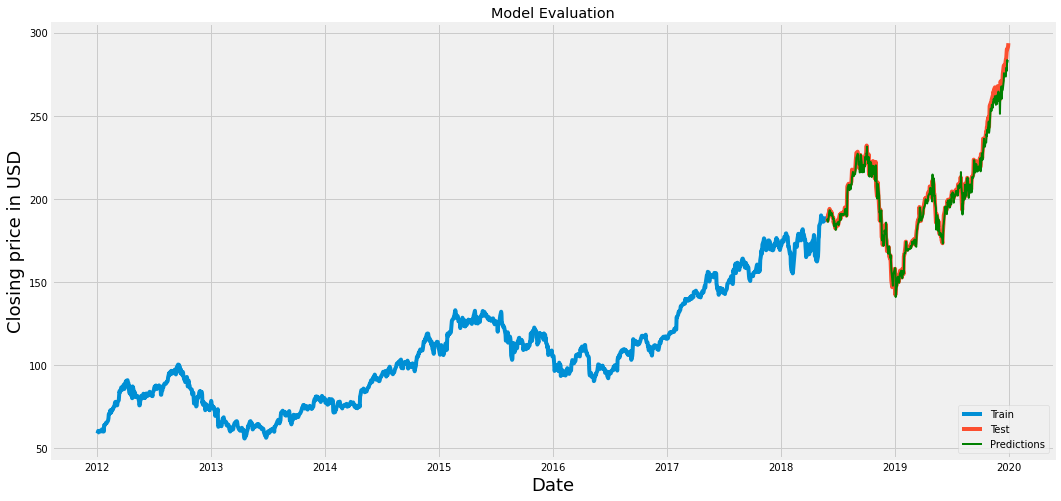

In [0]:
plt.figure(figsize=(16,8))
plt.title("Model Evaluation")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price in USD", fontsize = 18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(test['predictions'], 'g-', linewidth = 2)
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')
plt.show()

By using more features our model did not perform any better, it was slightly bad than using only the closing price. We can play more with the model structure to see for further improvement.